# Laboratorio 3 - Algoritmos estocásticos usando cadenas de Markov

MA4402 - Simulación Estocástica: Teoría y Laboratorio

Profesor: Joaquín Fontobona T.

Auxiliares: Pablo Zúñiga Rodríguez-Peña, Arie Wortsman Z., Camilo Carvajal Reyes

In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
from copy import copy, deepcopy



In [19]:
def macro_1(x,n):
    s = np.sum(x)
    l = (2*n+1)**2
    return s/l

def macro_2(x,n):
    s = np.sum(x**2)
    l = (2*n+1)**2
    return s/l
def promedioint(x):
    s=0
    for j in range(1,len(x)-1):
        for i in range(1,len(x)-1):
            s+=x[j,i]
    return s/((len(x)-2)**2)


In [51]:
#Genera una grilla del tamaño necesario
def generategrid(N,numero):
    ones=np.zeros((2*N+1, 2*N+1))
    ones[0,:]=numero
    ones[:,0]=numero
    ones[2*N,:]=numero
    ones[:,2*N]=numero
    return ones
#Deja fijo los bordes de la grilla en spin 1 y el interior lo establece en 1 o -1 dependiendo de realizaciones de variables
#bernoulli de parametro p a ingresar en la función.
def randomgrid(N,numero):
    grid=generategrid(N,numero)
    for i in range(1,2*N):
        for j in range(1,2*N):
            grid[i,j]=np.random.randint(-10,10)
    return grid

#funciones auxiliares para la transición del método
def getnumber(v,largo):
    newlargo=(largo-1)*2+1
    if v/newlargo-int(v/newlargo) == 0:
        integer=int(v/(newlargo))-1
    else:
        integer=int(v/newlargo)
    columna=v-integer*newlargo
    return (integer+1,int(columna))

def getenergy(grid):
    energia=0
    largo=len(grid)
    for i in range(0,largo-1):
        for j in range(0,largo-1):
            dif=(grid[i][j]-grid[i][j+1])**2+(grid[i][j]-grid[i+1][j])**2
            energia+=dif
    return energia

def getnewenergy(newgrid,oldgrid,pos,oldenergy):
    p=oldenergy
    one=pos[0]
    two=pos[1]
    a=newgrid[one][two-1]
    b=newgrid[one-1][two]
    c=newgrid[one][two+1]
    d=newgrid[one+1][two]
    e=newgrid[one][two]
    
    en1=(e-a)**2+(e-b)**2+(e-c)**2+(e-d)**2
    a1=oldgrid[one][two-1]
    b1=oldgrid[one-1][two]
    c1=oldgrid[one][two+1]
    d1=oldgrid[one+1][two]
    e1=oldgrid[one][two]
    en2=(e1-a1)**2+(e1-b1)**2+(e1-c1)**2+(e1-d1)**2
    
    return oldenergy+(en1-en2)
#funcion que realiza las transiciones en el grafo utilizado por el método de metropolis
def CM(u,v,vv,grid,paso,beta):
    n=len(v)
    C=[]
    old=grid
    oldenergy=getenergy(grid)
    for i in range(1,n+1):
        num=getnumber(v[i-1],(len(grid)-1)/2)
        
        newgrid=deepcopy(old)
        newgrid[num[0]][num[1]]=(old[num[0]][num[1]])+vv[i-1]
        
        energynew=getnewenergy(newgrid,old,num,oldenergy)
        dif=oldenergy-energynew
        if u[i-1]<=np.exp(beta*dif):
            old=deepcopy(newgrid)
            oldenergy=energynew
    return(old,beta) 

In [13]:
def macro2(u,v,vv,grid,paso,beta,largo):
    n=len(v)
    C=[]
    old=grid
    oldenergy=getenergy(grid)
    for i in range(1,n+1):
        num=getnumber(v[i-1],(len(grid)-1)/2)
        
        newgrid=deepcopy(old)
        newgrid[num[0]][num[1]]=(old[num[0]][num[1]])+vv[i-1]
        
        energynew=getnewenergy(newgrid,old,num,oldenergy)
        dif=oldenergy-energynew
        if u[i-1]<=np.exp(beta*dif):
            old=deepcopy(newgrid)
            oldenergy=energynew
    a=macro_2(old,largo)
    return(a)
def inimacro2(largogrilla,paso,pasos,beta,numero):
    v=[]
    u=[]
    vv=[]
    grilla=generategrid(largogrilla,numero)
    pp=(2*largogrilla-1)**2
    for i in range(0,pasos):
        v.append(np.random.randint(1,pp+1))
        u.append(np.random.uniform(0,1))
        vv.append(np.random.randint(-10,10))
    return(CM(u,v,vv,grilla,paso,beta))

In [14]:
np.random.seed(42)
a=np.arange(0.05,10,0.25)
spi=[]
beta=[]
for j in range(1,len(a)):
    beta.append(a[j])

for i in range(1,len(a)):
    spi.append((inimacro2(50,0,3000000,a[i],0.35)))


In [21]:
promedios=[]
for j in range(0,len(spi)):
    promedios.append(promedioint(spi[j][0]))
print(promedios)

[0.01775329048056321, 0.037139067442097745, 0.004081216202428324, 0.004387307417610448, 0.001122334455667789, 0.00020406081012141618, 0.0, 0.00030609121518212427, 0.00010203040506070809, -0.00010203040506070809, 0.0, 0.0, 0.00010203040506070809, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [23]:
print(np.arange(0.05,10,0.25))

[0.05 0.3  0.55 0.8  1.05 1.3  1.55 1.8  2.05 2.3  2.55 2.8  3.05 3.3
 3.55 3.8  4.05 4.3  4.55 4.8  5.05 5.3  5.55 5.8  6.05 6.3  6.55 6.8
 7.05 7.3  7.55 7.8  8.05 8.3  8.55 8.8  9.05 9.3  9.55 9.8 ]


In [22]:
def graficar3d(grid,beta):
    fig = plt.figure(figsize=(25, 25))
    ax1 = fig.add_subplot(333, projection='3d')


    _x = np.arange(101)
    _y = np.arange(101)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    top = grid[x, y]
    bottom = np.zeros_like(top)
    width = depth = -1

    ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
    ax1.set_title('IvGFF'+str(beta))

    plt.show()

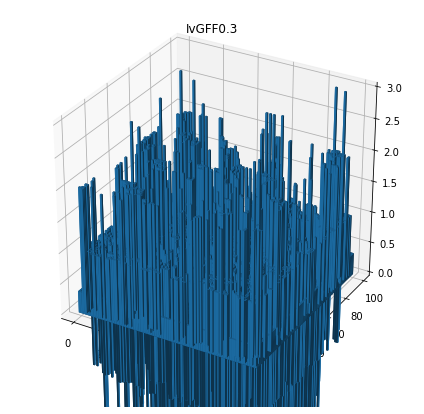

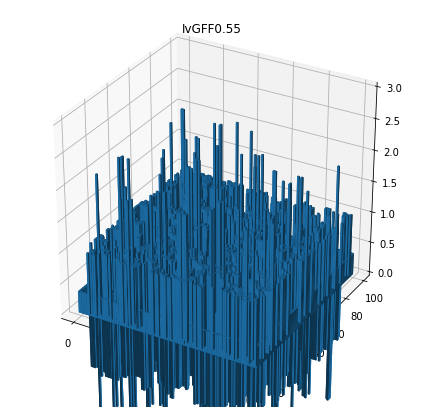

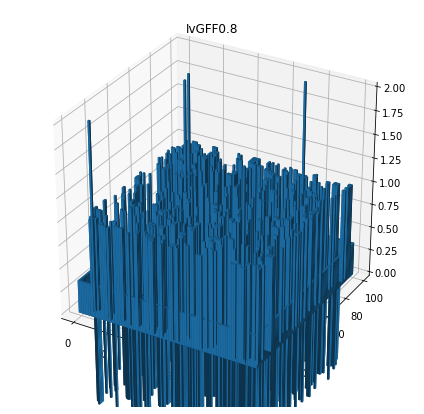

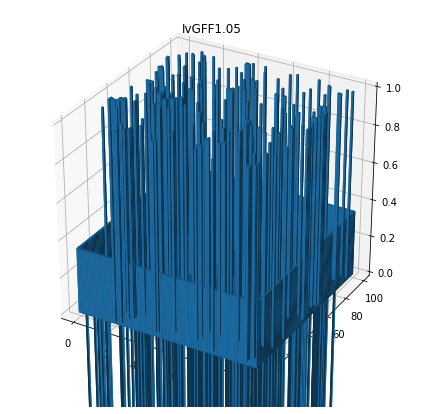

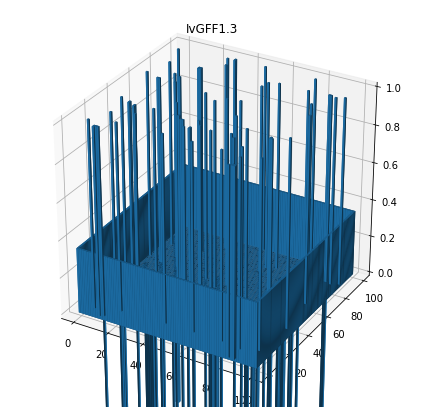

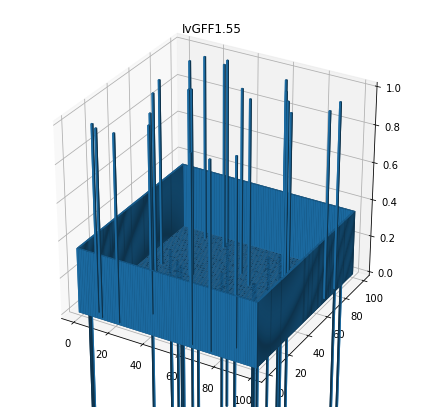

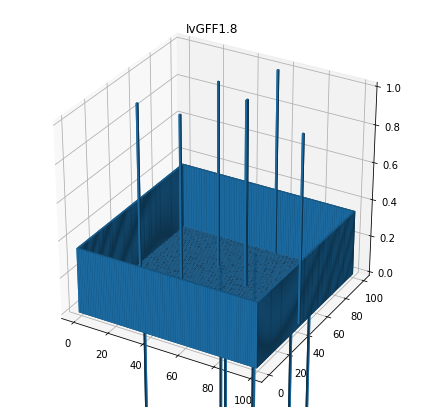

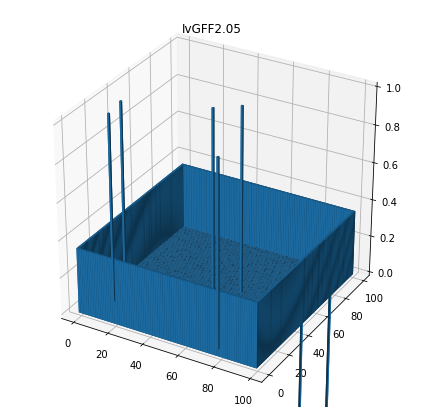

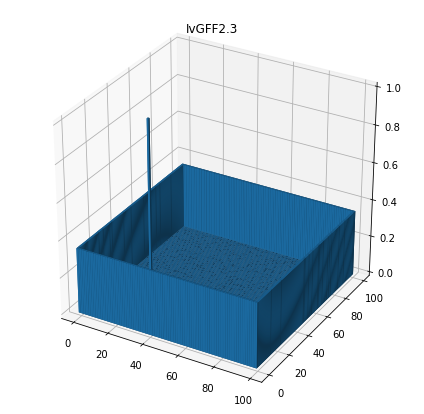

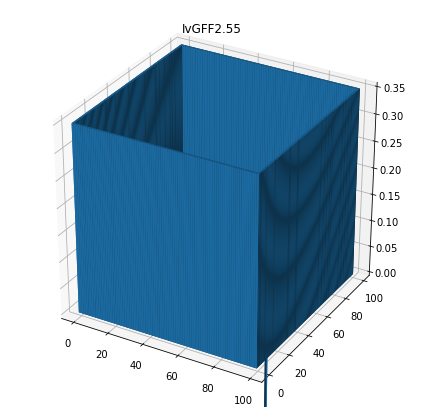

In [29]:
#graficos 3d para distintos valores de beta especificados en el titulo de los graficos, 
#con condicion inicial igual a 0 y diferencia de altura entre -10 y 10 entre cada simulacion
for j in range(0,10):
    graficar3d(spi[j][0],spi[j][1])
    

In [27]:
np.linspace(0,38,10,dtype=int)

array([ 0,  4,  8, 12, 16, 21, 25, 29, 33, 38])

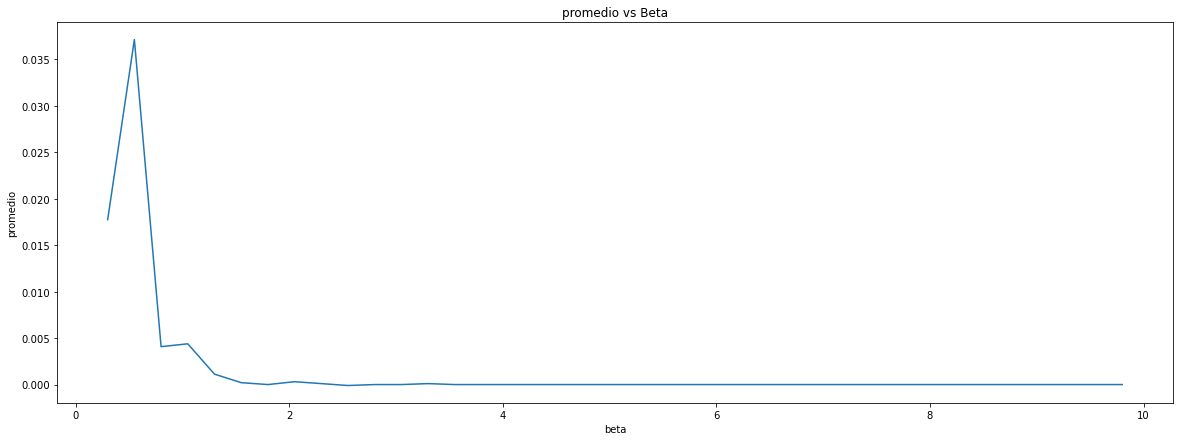

In [31]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
plt.title("promedio vs Beta")
plt.xlabel("beta")
plt.ylabel("promedio")
plt.plot(beta,promedios)

plt.show()

## Borde fijo en 1

In [40]:
spi.append((inimacro2(50,0,3000000,0.3,1)))


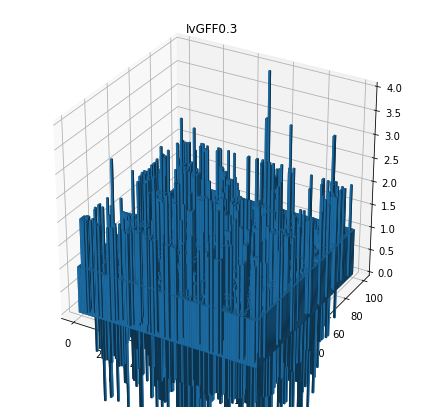

In [33]:
#Grafico 3d de grilla con condicion inicial en 0, beta= 0.3 y diferencia de altura entre -10 y 10 
#entre cada simulación
graficar3d(spi[0][0],spi[0][1])

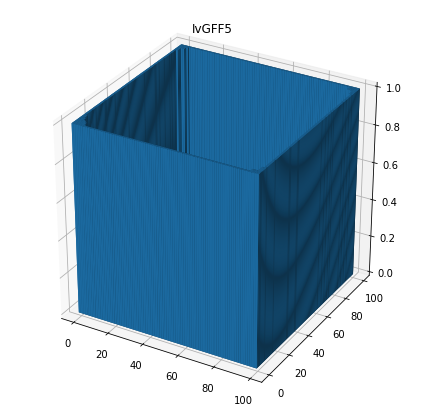

In [43]:
#Grafico 3d de grilla con condicion inicial en 0, beta= 5 y diferencia de altura entre -10 y 10 
#entre cada simulación
spi1=[]
spi1.append((inimacro2(50,0,3000000,0.3,1)))
graficar3d(spi1[0][0],spi1[0][1])

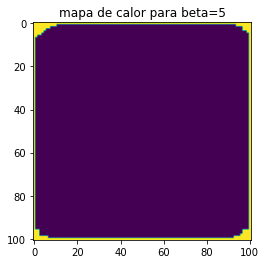

In [44]:
plt.imshow(spi[0][0])
plt.title("mapa de calor para beta=5")
plt.show()

In [54]:
def CM1(u,v,vv,grid,paso,beta):
    n=len(v)
    C=[]
    old=grid
    oldenergy=getenergy(grid)
    pasos=np.arange(0,n+1,paso)
    for i in range(1,n+1):
        num=getnumber(v[i-1],(len(grid)-1)/2)
        
        newgrid=deepcopy(old)
        newgrid[num[0]][num[1]]=(old[num[0]][num[1]])+vv[i-1]
        
        energynew=getnewenergy(newgrid,old,num,oldenergy)
        dif=oldenergy-energynew
        if u[i-1]<=np.exp(beta*dif):
            old=deepcopy(newgrid)
            oldenergy=energynew
        if i in pasos:  
            plt.imshow(old)
            plt.title("Transición en el paso: "+str(i))
            plt.show()
    return(old,beta) 

In [55]:
def inimacro3(largogrilla,paso,pasos,beta,numero):
    v=[]
    u=[]
    vv=[]
    grilla=randomgrid(largogrilla,numero)
    pp=(2*largogrilla-1)**2
    for i in range(0,pasos):
        v.append(np.random.randint(1,pp+1))
        u.append(np.random.uniform(0,1))
        vv.append(np.random.choice([-1,1]))
    return(CM1(u,v,vv,grilla,paso,beta))

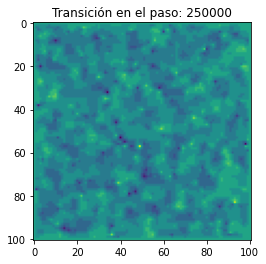

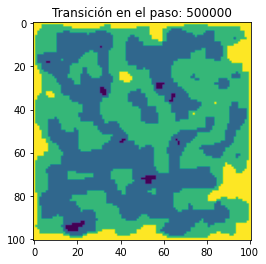

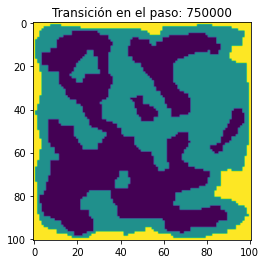

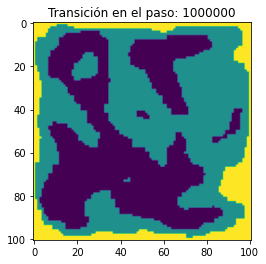

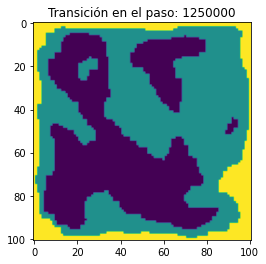

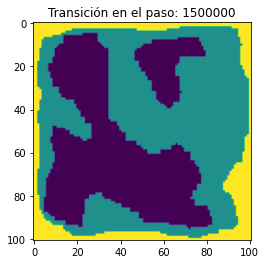

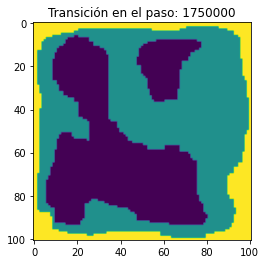

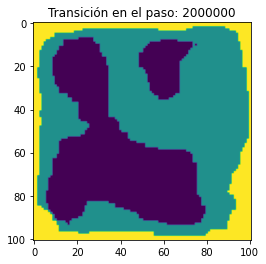

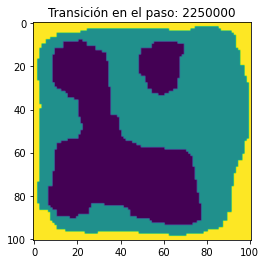

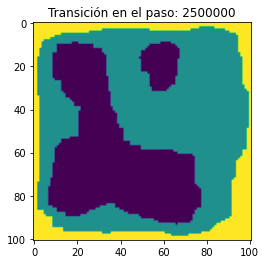

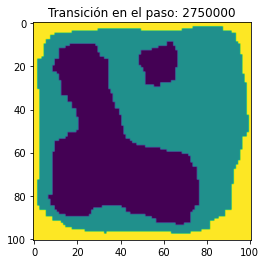

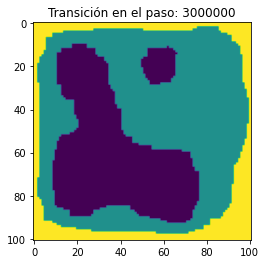

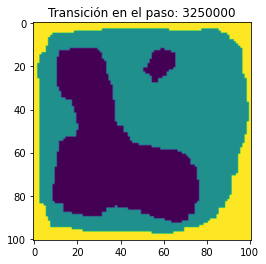

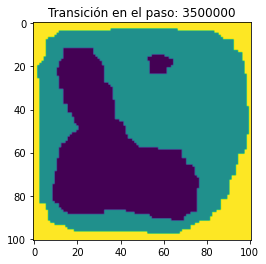

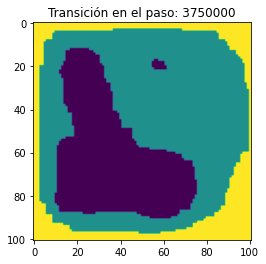

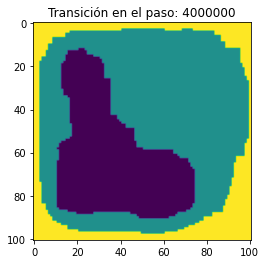

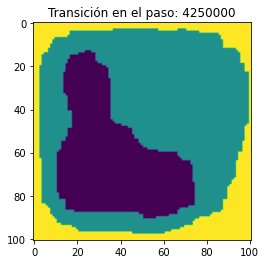

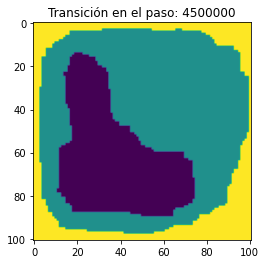

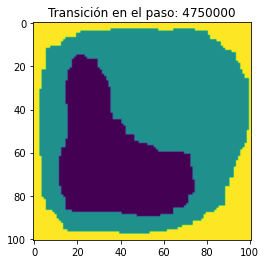

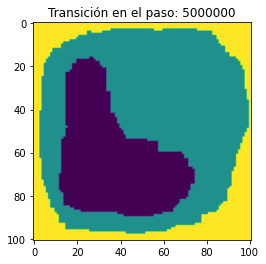

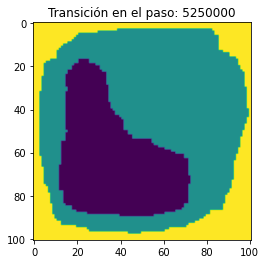

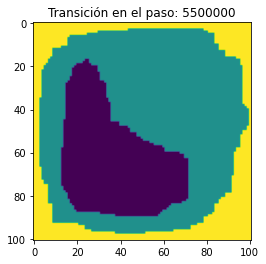

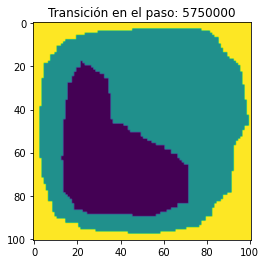

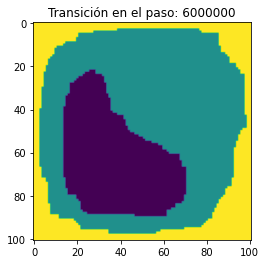

In [57]:
#grafico de calor para beta = 5 y borde fijo en 1, condición inicial aleatoria con 
#valores entre -10 y 10 y diferencias de altura de 1 entre cada transición

dd=inimacro3(50,250000,6000000,5,1)